In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vaccine_df = pd.read_csv("country_vaccinations.csv")
vaccine_brand_df = pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [2]:
vaccine_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
vaccine_brand_df.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [7]:
vaccine_df.info()
vaccine_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [69]:
# Identify numeric and non-numeric columns
df1=vaccine_df
numeric_cols = df1.select_dtypes(include=['number']).columns
non_numeric_cols = df1.select_dtypes(include=['object']).columns

# Fill numeric columns with median
for col in numeric_cols:
    median_value = df1[col].mean()
    df1[col] = df1[col].fillna(median_value)

# Fill non-numeric columns with mode
for col in non_numeric_cols:
    mode_value = df1[col].mode()[0]
    df1[col] = df1[col].fillna(mode_value)

# Confirm no missing values remain
print(df1.isnull().sum())
df1.to_csv("vaccine_cleaned.csv", index = False)

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


In [31]:
df2 = vaccine_brand_df
df2.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

# Exploaratory Data Analysis

<b>Questions

country
China            3.263129e+09
India            1.834501e+09
United States    5.601818e+08
Brazil           4.135596e+08
Indonesia        3.771089e+08
Japan            2.543456e+08
Bangladesh       2.436427e+08
Pakistan         2.193686e+08
Vietnam          2.031444e+08
Mexico           1.919079e+08
Name: total_vaccinations, dtype: float64


<Axes: title={'center': 'Top 10 Countries by Total Vaccinations'}, xlabel='country'>

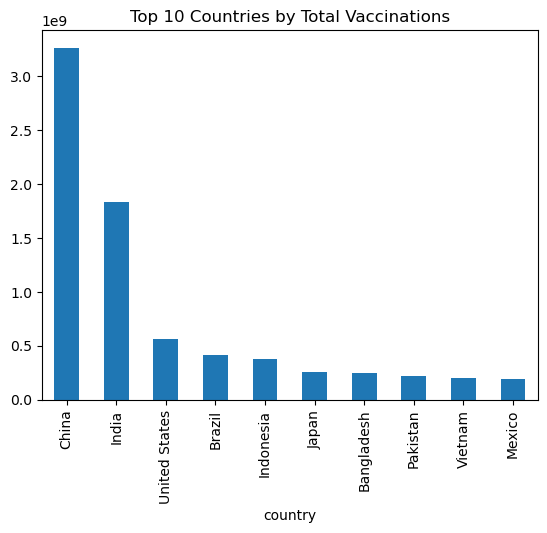

In [33]:
# Q1: Which countries have vaccinated the most people?
top_vaccine = df1.groupby("country")["total_vaccinations"].max().sort_values(ascending=False).head(10)
print(top_vaccine)
top_vaccine.plot(kind="bar", title="Top 10 Countries by Total Vaccinations")

<Axes: title={'center': 'Daily Vaccinations in India'}, xlabel='date'>

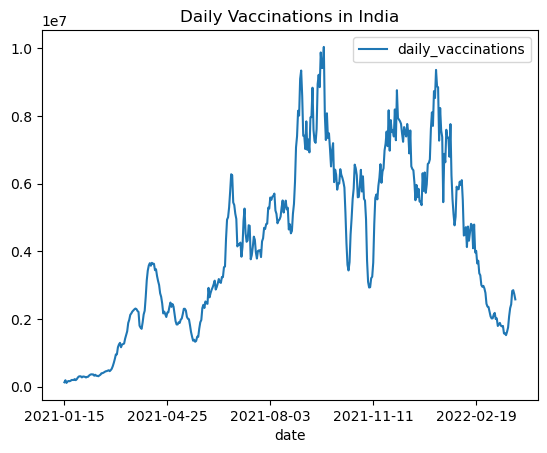

In [35]:
# Q2: What is the daily vaccination trend in India
india = df1[df1["country"] == "India"]
india.plot(x="date", y="daily_vaccinations", title="Daily Vaccinations in India")

In [37]:
# Q3: When did each country start vaccinating?
first_dates = df1[df1["people_vaccinated"] > 0].groupby("country")["date"].min()
print("Early Responders:\n",first_dates.sort_values().head(10))
print("\nLate Responders:\n",first_dates.sort_values().tail(10))

Early Responders:
 country
Latvia           2020-12-04
Norway           2020-12-08
Denmark          2020-12-08
United States    2020-12-13
Canada           2020-12-14
Russia           2020-12-15
China            2020-12-15
Israel           2020-12-19
Switzerland      2020-12-21
Qatar            2020-12-22
Name: date, dtype: object

Late Responders:
 country
Kiribati        2021-06-02
Burkina Faso    2021-06-02
Vanuatu         2021-06-02
Chad            2021-06-10
Pitcairn        2021-06-15
Niue            2021-06-22
Tokelau         2021-06-22
Haiti           2021-07-16
Tanzania        2021-08-08
Burundi         2021-10-19
Name: date, dtype: object


In [39]:
# Q4: Which country uses the most different vaccine brands?
brand_count = df2.groupby("location")["vaccine"].nunique().sort_values(ascending=False)
print("Diversity of vaccine usage\n",brand_count.head(10))

Diversity of vaccine usage
 location
European Union    9
Portugal          8
Latvia            7
Slovakia          6
Hungary           6
Argentina         6
Cyprus            5
Italy             5
Ukraine           5
South Korea       5
Name: vaccine, dtype: int64


vaccine
Pfizer/BioNTech       344835955037
Moderna               103072147621
Oxford/AstraZeneca     46451509497
Sinovac                13407163275
Johnson&Johnson        12611375881
Sinopharm/Beijing      10877006517
Sputnik V               5787343199
CanSino                  271397675
Novavax                    8268113
Covaxin                       3572
Name: total_vaccinations, dtype: int64


<Axes: title={'center': 'Most Used Vaccine Brands Globally'}, xlabel='vaccine'>

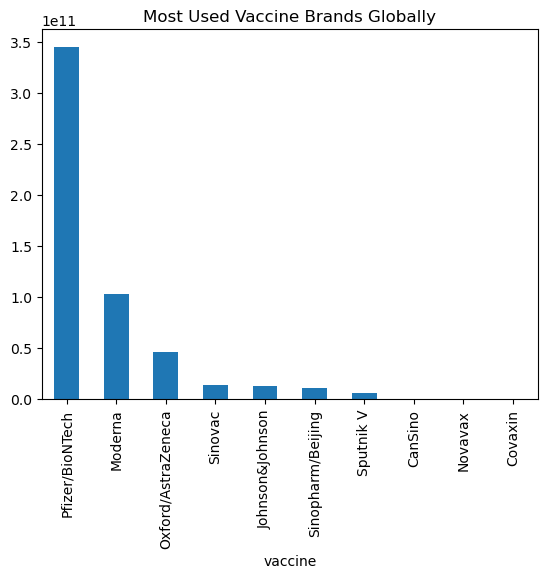

In [41]:
# Q5: Which vaccine brands were most used globally?
global_vaccine_brand = df2.groupby("vaccine")["total_vaccinations"].sum().sort_values(ascending=False)
print(global_vaccine_brand)
global_vaccine_brand.plot(kind="bar", title="Most Used Vaccine Brands Globally")

In [57]:
# Q6: Which countries achieved the fastest vaccination rollout (1M doses)?
million_reach = df1[df1["total_vaccinations"] >= 1_000_000].groupby("country")["date"].min().reset_index()
print(million_reach.head(10))

               country        date
0          Afghanistan  2021-02-23
1              Albania  2021-01-11
2              Algeria  2021-01-31
3              Andorra  2021-01-26
4               Angola  2021-03-02
5             Anguilla  2021-02-05
6  Antigua and Barbuda  2021-02-17
7            Argentina  2021-02-24
8              Armenia  2021-04-01
9                Aruba  2021-03-30


In [95]:
# Q7: What % of a country's population is fully vaccinated?
latest = df1.sort_values("date").drop_duplicates(subset=["country"], keep="last")
latest["fully_vax_percent"] = (latest["people_fully_vaccinated_per_hundred"])
top = latest.sort_values("fully_vax_percent", ascending=False).head(10)
print(top[["country", "fully_vax_percent"]])


                    country  fully_vax_percent
30235             Gibraltar             122.37
62293              Pitcairn             100.00
81916  United Arab Emirates              96.12
63189              Portugal              92.60
11745                Brunei              91.71
70228             Singapore              91.04
49111                 Malta              90.35
15755                 Chile              90.29
63652                 Qatar              88.50
14701        Cayman Islands              87.80


In [67]:
# Q8. How long did it take each country to go from first dose to 50% full vaccination?
df1["date"] = pd.to_datetime(df1["date"]) 
first_dose = df1[df1['people_vaccinated'] > 0].groupby("country")["date"].min()
half_vax = df1[df1['people_fully_vaccinated_per_hundred'] >= 50].groupby("country")["date"].min()
time_taken = (half_vax - first_dose).dropna().sort_values()
print(time_taken.head(10))

country
Cook Islands                35 days
Niue                        41 days
Pitcairn                    42 days
Gibraltar                   63 days
Falkland Islands            65 days
Aruba                       73 days
San Marino                  85 days
Sint Maarten (Dutch part)   91 days
Jersey                      91 days
Saint Helena                91 days
Name: date, dtype: timedelta64[ns]


In [71]:
#9. Which countries maintained consistent vaccination (low std deviation)?
std_dev = df1.groupby("country")["daily_vaccinations"].std().sort_values()
print(std_dev.head(10)) 

country
Liechtenstein               6097.050457
Cayman Islands              6145.321078
Bermuda                     6250.167232
Turks and Caicos Islands    6253.244628
Gibraltar                   6260.645162
Iceland                     6295.864627
Seychelles                  6300.114986
Isle of Man                 6335.745798
Guernsey                    6370.746636
Luxembourg                  6397.647893
Name: daily_vaccinations, dtype: float64


In [74]:
# Q10: What is the gap between first dose and second dose for each country?
gap_data = df[df["people_fully_vaccinated"].notna()]
gap_data["dose_gap"] = abs(gap_data["people_vaccinated"] - gap_data["people_fully_vaccinated"])
print(gap_data.groupby("country")["dose_gap"].mean().sort_values())

country
Estonia             7.205909e+04
Slovenia            3.185303e+05
Malta               3.239042e+05
Northern Ireland    3.246232e+05
Ireland             3.397695e+05
                        ...     
Indonesia           2.674136e+07
United States       2.842748e+07
Brazil              3.306264e+07
China               3.887890e+07
India               2.041826e+08
Name: dose_gap, Length: 223, dtype: float64
